<a href="https://colab.research.google.com/github/jessfeld/netpyne_course_2021/blob/main/tut_netpyne_stim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuron
!pip install netpyne
import matplotlib

     |████████████████████████████████| 12.6MB 297kB/s 
     |████████████████████████████████| 317kB 8.8MB/s 



Start time:  2021-05-20 15:35:34.331037

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 48 
  Done; cell stims creation time = 0.00 s.
Recording 2 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 0.40 s; real-time ratio: 2.49.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 40
  Connections: 16 (0.40 per cell)
  Spikes: 134 (3.35 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.40 s
  Done; saving time = 0.01 s.
Plotting raster...


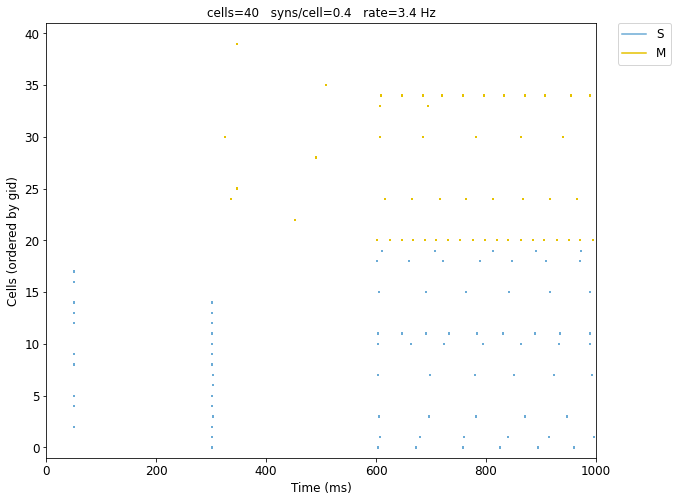

Plotting recorded cell traces ... cell


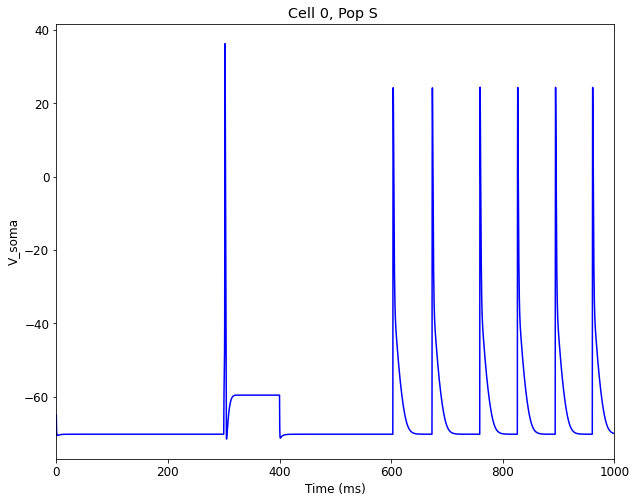

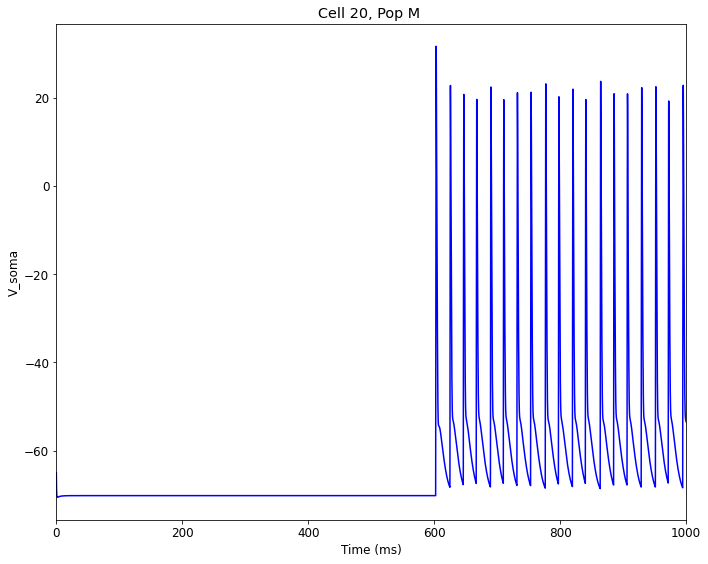

  Done; plotting time = 1.15 s

Total time = 1.59 s

End time:  2021-05-20 15:35:35.926723


In [ ]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Cell params
secs = {}   # sections dict
secs['soma'] = {'geom': {}, 'mechs': {}}                                                    # soma params dict
secs['soma']['geom'] = {'diam': 18.8, 'L': 18.8}                                            # soma geometry
secs['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['PYR'] = {'secs': secs}                                                # add dict to list of cell params

## Population parameters
netParams.popParams['S'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}
netParams.popParams['M'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}

## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism

## Stimulation parameters
netParams.stimSourceParams['Input_1'] = {'type': 'IClamp', 'del': 300, 'dur': 100, 'amp': 'uniform(0.4,0.5)'}
netParams.stimSourceParams['Input_2'] = {'type': 'VClamp', 'dur': [0,50,200], 'amp': [-60,-30,40], 'gain': 1e5, 'rstim': 1, 'tau1': 0.1, 'tau2': 0}
netParams.stimSourceParams['Input_3'] = {'type': 'AlphaSynapse', 'onset': 'uniform(300,600)', 'tau': 5, 'gmax': 'post_ynorm', 'e': 0}
netParams.stimSourceParams['Input_4'] = {'type': 'NetStim', 'interval': 'uniform(20,100)', 'start': 600, 'noise': 0.1}

netParams.stimTargetParams['Input_1->S'] = {'source': 'Input_1', 'sec':'soma', 'loc': 0.8, 'conds': {'pop':'S', 'cellList': list(range(15))}}
netParams.stimTargetParams['Input_2->S'] = {'source': 'Input_2', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':'S', 'ynorm': [0,0.5]}}
netParams.stimTargetParams['Input_3->M1'] = {'source': 'Input_3', 'sec':'soma', 'loc': 0.2, 'conds': {'pop':'M', 'cellList': [2,4,5,8,10,15,19]}}
netParams.stimTargetParams['Input_4->PYR'] = {'source': 'Input_4', 'sec':'soma', 'loc': 0.5, 'weight': '0.1+normal(0.2,0.05)','delay': 1,
                                            'conds': {'cellType':'PYR', 'ynorm': [0.6,1.0]}}


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut6'         # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'saveFig': True}                                 # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('S',0), ('M',0)], 'saveFig': True}  # Plot recorded traces for this list of cells


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)




1) Modify the network to show that you can use the IntFire2 population to provide inhibition to another population (probably using negative weights).